In [5]:
'''
Kyle Leibowitz
CS471 Machine Learning
Kameron Harris
Gitrepo: leibowk@wwu.edu
'''

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight
from sklearn import metrics
import math

In [2]:
def getFitNValid(X, y, fit):
    n,_ = X.shape
    rowsFit = math.floor(fit*n)
    return X[:rowsFit, :], X[rowsFit:, :], y[:rowsFit], y[rowsFit:]

def testHyperparam(n_estimat, xTrain,yTrain, xValid, yValid):
    clasf=RandomForestClassifier(n_estimators=n_estimat, class_weight = 'balanced')
    clasf.fit(xTrain,yTrain)
    yPred=clasf.predict(xValid)
    print("N currently is: ", n_estimat, ' Bal Acc Score is:', metrics.balanced_accuracy_score(yValid, yPred))
    return metrics.balanced_accuracy_score(yValid, yPred)

In [3]:
X_train = np.loadtxt("X_train", delimiter = ",")
y_train = np.loadtxt("y_train", delimiter = ",")
X_test = np.loadtxt("X_test", delimiter = ",")

In [4]:
#xGetError and yGetError for finding error rate.
xGetParams, xGetError, yGetParams, yGetError = getFitNValid(X_train, y_train, .8)

#xTrain and yTrain for training, xValid, yValid for hyperparamater selection
xTrain, xValid, yTrain, yValid = getFitNValid(xGetParams, yGetParams, .9)

#really small for testing
xTrainS, xValidS, yTrainS, yValidS = getFitNValid(xGetParams, yGetParams, .05)

In [9]:
# #Testing RandomForestClassifier
# clasf=RandomForestClassifier(n_estimators=12, class_weight = 'balanced')
# clasf.fit(xTrain,yTrain)
# yPredError=clasf.predict(xValid)
# print(' Bal Acc Score for Random Forest Classifier is:', metrics.balanced_accuracy_score(yPredError, yValid))

# #Testing KNeighborsClassifier
# clasf=KNeighborsClassifier()
# clasf.fit(xTrain,yTrain)
# yPredError=clasf.predict(xValid)
# print(' Bal Acc Score for K Neighbors Classifier is:', metrics.balanced_accuracy_score(yPredError, yValid))

# #Testing DecisionTreeClassifier
# clasf=DecisionTreeClassifier(class_weight = 'balanced')
# clasf.fit(xTrain,yTrain)
# yPredError=clasf.predict(xValid)
# print(' Bal Acc Score for DecisionTreeClassifier is:', metrics.balanced_accuracy_score(yPredError, yValid))

# #Testing AdaBoostClassifier
# clasf=AdaBoostClassifier()
# clasf.fit(xTrain,yTrain)
# yPredError=clasf.predict(xValid)
# print(' Bal Acc Score for AdaBoostClassifier is:', metrics.balanced_accuracy_score(yPredError, yValid))

#Testing GradientBoostingClassifier
clasf=GradientBoostingClassifier()
clasf.fit(xTrain,yTrain)
yPredError=clasf.predict(xValid)
print(' Bal Acc Score for GradientBoostingClassifier is:', metrics.balanced_accuracy_score(yPredError, yValid))

 Bal Acc Score for GradientBoostingClassifier is: 0.6301856853641666


In [14]:
bestHyper = 0
bestBalAccScore = 0
n_estimat = 1
while n_estimat < 100:
    clasf=GradientBoostingClassifier(n_estimators = n_estimat)
    clasf.fit(xTrain,yTrain)
    yPredError=clasf.predict(xValid)
    balAccScore = metrics.balanced_accuracy_score(yPredError, yValid)
    print(' Bal Acc Score for',  n_estimat, 'GradientBoostingClassifier is:', balAccScore)
    if balAccScore > bestBalAccScore:
        bestBalAccScore = balAccScore
        bestHyper = n_estimat
    n_estimat += 10
print("Final Hyper paramater was: ", bestHyper, " which gave a balance accuracy score of: ", bestBalAccScore)

/home/leibowk/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1814: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


 Bal Acc Score for 1 GradientBoostingClassifier is: 0.5948005271354978


/home/leibowk/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1814: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


 Bal Acc Score for 11 GradientBoostingClassifier is: 0.6463513471925746


/home/leibowk/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1814: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


 Bal Acc Score for 21 GradientBoostingClassifier is: 0.6485327157807923


KeyboardInterrupt: 

N currently is:  1  Bal Acc Score is: 0.42186730682685697
 Bal Acc Score for 1 Random Forest Classifier is: 0.42186730682685697
N currently is:  2  Bal Acc Score is: 0.434831248938177
 Bal Acc Score for 2 Random Forest Classifier is: 0.434831248938177
N currently is:  3  Bal Acc Score is: 0.45500863495788124
 Bal Acc Score for 3 Random Forest Classifier is: 0.45500863495788124
N currently is:  4  Bal Acc Score is: 0.44370164781590615
 Bal Acc Score for 4 Random Forest Classifier is: 0.44370164781590615
N currently is:  5  Bal Acc Score is: 0.4668485182611926
 Bal Acc Score for 5 Random Forest Classifier is: 0.4668485182611926
N currently is:  6  Bal Acc Score is: 0.45485382806289026
 Bal Acc Score for 6 Random Forest Classifier is: 0.45485382806289026
N currently is:  7  Bal Acc Score is: 0.45299002311694253
 Bal Acc Score for 7 Random Forest Classifier is: 0.45299002311694253
N currently is:  8  Bal Acc Score is: 0.4590222682662681
 Bal Acc Score for 8 Random Forest Classifier is: 0.4

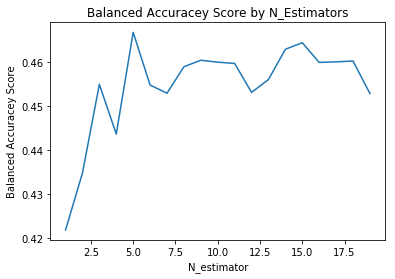

Final Hyper paramater was:  5  which gave a balance accuracy score of:  0.4668485182611926


In [8]:
bestHyper = 0
bestBalAccScore = 0
balAccScoreList = []
itter = []
for n_estimat in range(1, 20):
    balAccScore = testHyperparam(n_estimat, xTrain,yTrain, xValid, yValid)
    balAccScoreList.append(balAccScore)
    itter.append(n_estimat)
    print(' Bal Acc Score for',  n_estimat, 'Random Forest Classifier is:', balAccScore)
    if balAccScore > bestBalAccScore:
        bestBalAccScore = balAccScore
        bestHyper = n_estimat
plt.plot(itter, balAccScoreList)
plt.title("Balanced Accuracey Score by N_Estimators", fontsize=12) 
plt.xlabel('N_estimator')
plt.ylabel('Balanced Accuracey Score')
plt.show()
print("Final Hyper paramater was: ", bestHyper, " which gave a balance accuracy score of: ", bestBalAccScore)

In [9]:
#Final Execution
clasf=RandomForestClassifier(n_estimators= bestHyper, class_weight = 'balanced', n_jobs = -1)
clasf.fit(xGetParams,yGetParams)
yPredError=clasf.predict(xGetError)
print(' Bal Acc Score is:', metrics.balanced_accuracy_score(yGetError, yPredError))

 Bal Acc Score is: 0.45491187902295294


In [10]:
yPredTest=clasf.predict(X_test)

In [11]:
f = open("predictions_here", "w")
np.savetxt(f, yPredTest)

In [12]:
stringTest = str(metrics.balanced_accuracy_score(yGetError, yPredError))
print(stringTest)
f2 = open("error_pred.txt", "w")
f2.write('Estimated balance accuracy score is: ')
f2.write(stringTest)

0.45491187902295294


19